In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/ML_KAGGLE_1/data/data.csv")
df

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


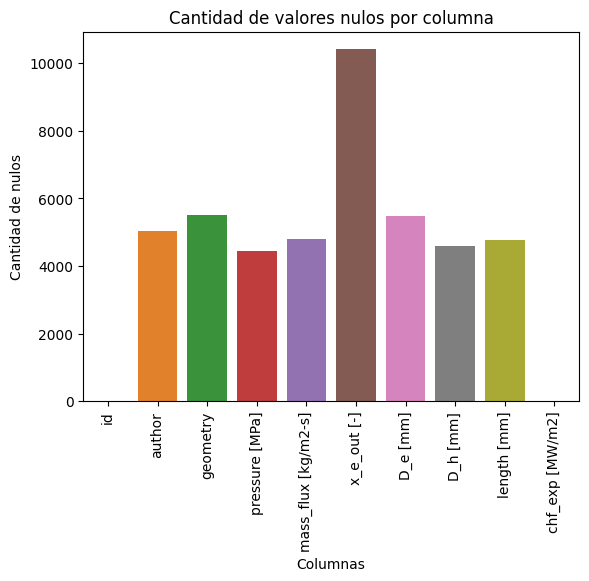

In [3]:
# Calcular la cantidad de valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Crear el gráfico de columnas utilizando Seaborn
sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values)

# Configurar etiquetas y título del gráfico
plt.xlabel('Columnas')
plt.ylabel('Cantidad de nulos')
plt.title('Cantidad de valores nulos por columna')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

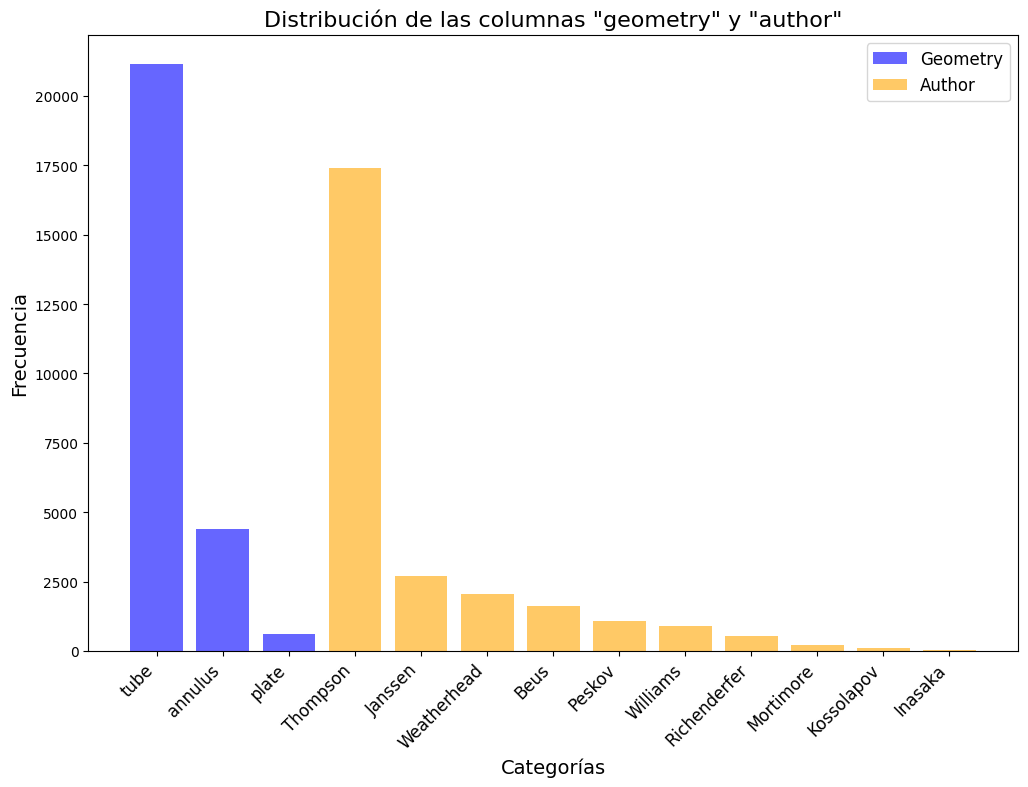

In [4]:

# Calcular la frecuencia de cada categoría en la columna "geometry" y "author"
geometry_counts = df['geometry'].value_counts()
author_counts = df['author'].value_counts()

# Crear el gráfico de barras con las columnas "geometry" y "author" en el mismo gráfico
plt.figure(figsize=(12, 8))

# Barras para la columna "geometry"
plt.bar(geometry_counts.index, geometry_counts.values, color='blue', alpha=0.6, label='Geometry')

# Barras para la columna "author"
plt.bar(author_counts.index, author_counts.values, color='orange', alpha=0.6, label='Author')

# Ajustar las etiquetas del eje X para la columna "geometry"
plt.xticks(rotation=45, ha='right', fontsize=12)

# Configurar el título y las etiquetas de los ejes
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de las columnas "geometry" y "author"', fontsize=16)
plt.legend(fontsize=12)

# Mostrar el gráfico de barras
plt.show()



In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import re


label_encoder=LabelEncoder()

cat_cols=df[["author","geometry"]]
num_cols = ["pressure [MPa]", "mass_flux [kg/m2-s]", 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']

imputer=SimpleImputer(strategy="most_frequent")
imputer_1=SimpleImputer(strategy="mean")



for col in cat_cols:
        
        df[col]=imputer.fit_transform(df[col].values.reshape(-1,1))
        
        df[col]=label_encoder.fit_transform(df[col])

for col_num in num_cols:
        
        df[col_num]=imputer_1.fit_transform(df[col_num].values.reshape(-1,1))
    

df.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in df.columns]
df

,id,author,geometry,pressure_MPa_,mass_flux_kg/m2-s_,x_e_out_-_,D_e_mm_,D_h_mm_,length_mm_,chf_exp_MW/m2_
0,0,7,2,7.000000,3770.000000,0.1754,8.629255,10.8,432.000000,3.6
1,1,7,2,10.640747,6049.000000,-0.0416,10.300000,10.3,762.000000,6.2
2,2,7,2,13.790000,2034.000000,0.0335,7.700000,7.7,457.000000,2.5
3,3,0,0,13.790000,3679.000000,-0.0279,5.600000,15.2,2134.000000,3.0
4,4,7,2,13.790000,686.000000,NaN,11.100000,11.1,457.000000,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,7,2,10.640747,1736.000000,0.0886,8.629255,7.8,591.000000,2.3
31640,31640,7,2,13.790000,3068.011023,NaN,4.700000,4.7,832.987391,3.9
31641,31641,7,2,18.270000,658.000000,-0.1224,3.000000,3.0,150.000000,2.3
31642,31642,7,2,6.890000,3825.000000,NaN,23.600000,23.6,1972.000000,3.7


In [6]:
train = df[~pd.isna(df["x_e_out_-_"])]

test=df[pd.isna(df["x_e_out_-_"])]
test

,id,author,geometry,pressure_MPa_,mass_flux_kg/m2-s_,x_e_out_-_,D_e_mm_,D_h_mm_,length_mm_,chf_exp_MW/m2_
4,4,7,2,13.790000,686.000000,NaN,11.100000,11.1,457.000000,2.8
7,7,5,2,18.000000,750.000000,NaN,10.000000,10.0,1650.000000,2.2
10,10,7,2,10.640747,3068.011023,NaN,1.900000,1.9,152.000000,3.2
12,12,7,2,6.890000,7500.000000,NaN,8.629255,12.8,1930.000000,4.8
23,23,0,0,15.510000,1355.000000,NaN,5.600000,15.2,2134.000000,2.1
...,...,...,...,...,...,...,...,...,...,...
31633,31633,7,2,11.030000,3068.011023,NaN,11.500000,11.5,832.987391,2.0
31634,31634,6,1,1.010000,2000.000000,NaN,15.000000,120.0,10.000000,6.2
31637,31637,8,2,13.790000,688.000000,NaN,8.629255,11.1,457.000000,2.3
31640,31640,7,2,13.790000,3068.011023,NaN,4.700000,4.7,832.987391,3.9


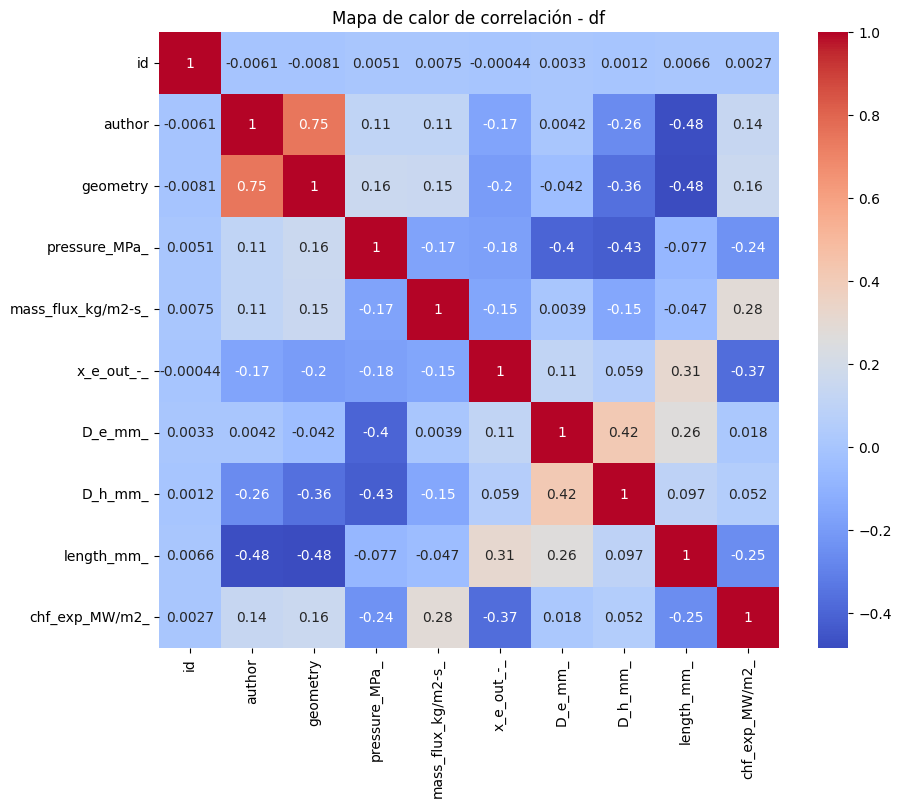

In [7]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación - df')

# Mostrar el gráfico
plt.show()

In [9]:
X=train.drop(columns="x_e_out_-_")
y=train["x_e_out_-_"]

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=1,
                                                  shuffle=True)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Realizar estandarización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con las características estandarizadas
gb = GradientBoostingRegressor(loss="squared_error",
                               max_depth=5,
                               n_estimators=150,
                               min_samples_leaf=5) # Este fue el que hizo que mejorara una vez probado, además de escalar
gb.fit(X_train_scaled, y_train.values.reshape(-1, 1))

# Realizar predicciones en el conjunto de prueba
y_pred = gb.predict(X_test_scaled)

# Calcular el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.0759103845868796


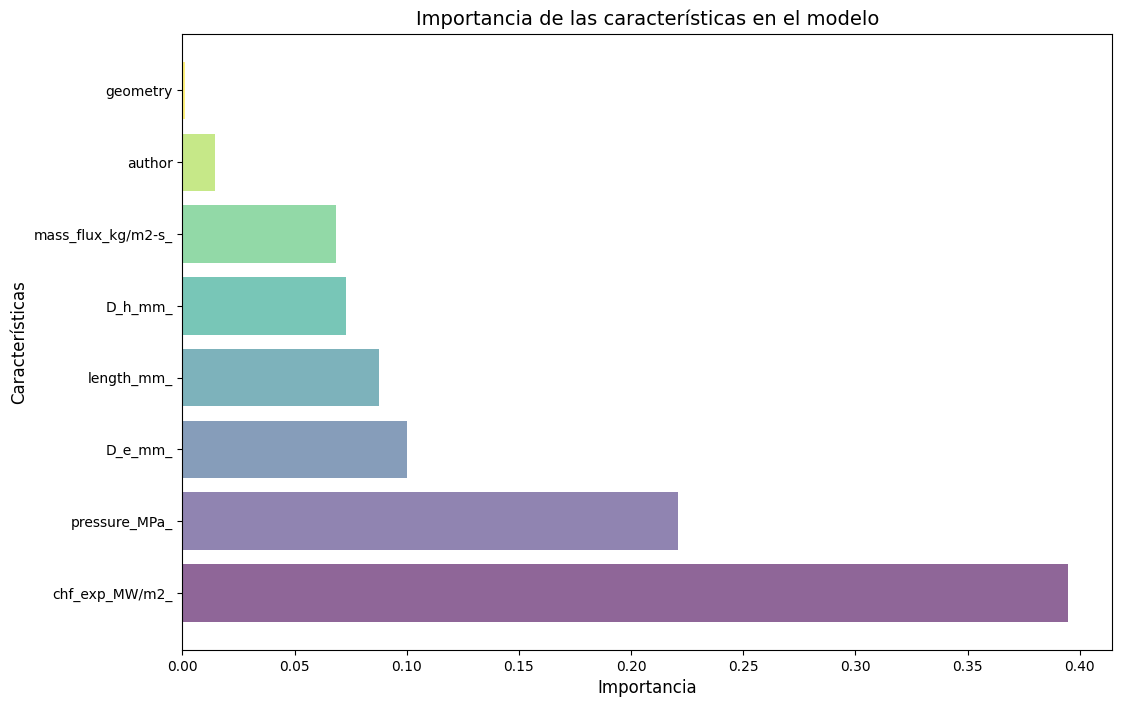

In [13]:
# Obtener la importancia de las características
importancia_caracteristicas = gb.feature_importances_

# Obtener los nombres de las características
if isinstance(X, pd.DataFrame):
    nombres_caracteristicas = X.columns
else:
    nombres_caracteristicas = np.arange(X.shape[1])

# Obtener los índices de las características que no sean "id"
indices_no_id = np.where(nombres_caracteristicas != "id")[0]
importancia_caracteristicas = importancia_caracteristicas[indices_no_id]
nombres_caracteristicas = nombres_caracteristicas[indices_no_id]

# Ordenar las características y su importancia de mayor a menor
sorted_indices = np.argsort(importancia_caracteristicas)[::-1]
importancia_caracteristicas = importancia_caracteristicas[sorted_indices]
nombres_caracteristicas = nombres_caracteristicas[sorted_indices]

# Crear el gráfico de barras con colores distintos
colores = plt.cm.viridis(np.linspace(0, 1, len(nombres_caracteristicas)))
plt.figure(figsize=(12, 8))
plt.barh(nombres_caracteristicas, importancia_caracteristicas, color=colores, alpha=0.6)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.title('Importancia de las características en el modelo', fontsize=14)

# Mostrar el gráfico de barras
plt.show()

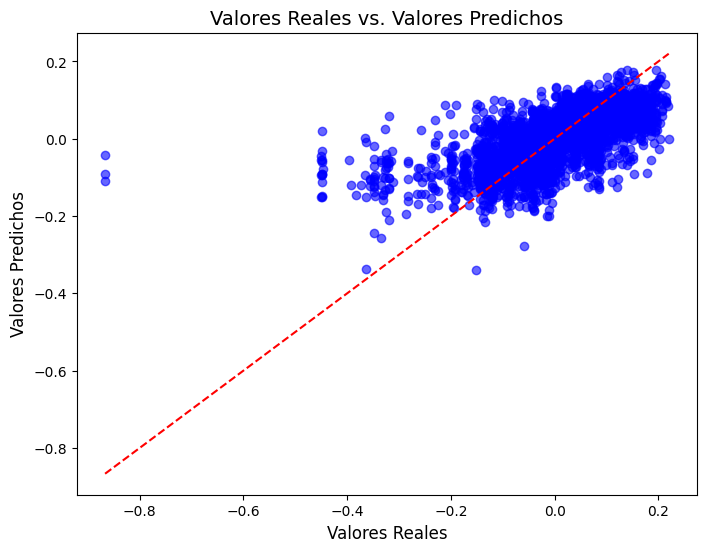

In [12]:
import matplotlib.pyplot as plt

# Supongamos que tienes los valores reales en la variable y_real y los valores predichos en la variable y_pred

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Valores Reales vs. Valores Predichos', fontsize=14)

# Mostrar el gráfico
plt.show()

In [11]:
# X_nuevo=test.drop(columns="x_e_out_-_")
# X_nuevo_scaled=scaler.transform(X_nuevo)

# y_nuevo=test["x_e_out_-_"]

# y_pred_nuevo=gb.predict(X_nuevo_scaled)
# test.rename(columns={'x_e_out_-_': 'x_e_out [-]'}, inplace=True)
# test["x_e_out [-]"]=y_pred_nuevo

# test.to_csv("2_pred.csv", index=False)

# prueba= pd.read_csv("2_pred.csv")
# # Mantener solo las columnas "id" y "x_e_out [mm]"
# columnas_deseadas = ["id", "x_e_out [-]"]
# prueba = prueba[columnas_deseadas]
# # Guardar el DataFrame resultante en un nuevo archivo CSV
# prueba.to_csv("2_pred_filtrado.csv", index=False)